In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn import svm
#from scipy.stats import model_selection
from sklearn import preprocessing

from sklearn.svm import LinearSVR
import time

In [2]:
# Load dataset
data=pd.read_csv("C:\\Users\\mo69fon\\Small_Molecules_SP\\SM+PD2.csv")
data

,Name,Solubility parameter,number of repeating units,Molecular weight,Connectivity index 0X,Connectivity index 1X,Connectivity index 0Xv,Connectivity index 1Xv,Quadrupole moment,Atomization energy (kJ/mol),...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,"2,2,3,3-tetramethylbutane",14.58,1,114.000,6.414214,3.457107,6.414214,3.457107,-41.98,10230.26,...,4.390033,14.062500,1.757812,0.000000,0.000000,0.0,58,9,4.844,38
1,"2,2,3-trimethylbutane",14.07,1,100.000,5.491564,3.127827,5.491564,3.127827,-36.86,9031.25,...,4.353270,12.293055,1.756151,0.000000,0.000000,0.0,42,6,4.238,30
2,"2,2-dimethyl-3-hexanol",19.31,1,130.000,6.905777,4.127827,6.352991,3.808676,-45.38,10653.67,...,4.819843,16.266070,1.807341,2.430904,2.430904,0.0,92,9,2.361,38
3,"2,2-dimethyl-3-pentanol",19.57,1,116.000,6.198671,3.627827,5.645884,3.308676,-40.05,9437.67,...,4.838338,14.275065,1.784383,2.396386,2.396386,0.0,63,8,1.792,34
4,"2,2-dimethylbutane",13.75,1,86.000,4.621320,2.707107,4.621320,2.707107,-31.76,7826.93,...,4.305478,10.465990,1.744332,0.000000,0.000000,0.0,28,3,3.730,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,2-methyl-3-pentanol,20.70,1,102.170,5.276021,3.304530,4.723234,2.985379,-35.58,8227.16,...,4.862117,12.505243,1.786463,2.394392,2.394392,0.0,46,6,1.397,26
311,3-methyl-2-pentanol,21.11,1,102.170,5.276021,3.304530,4.723234,2.985379,-34.75,8224.03,...,4.862117,12.505243,1.786463,2.348368,2.348368,0.0,46,6,1.608,26
312,4-methyl-2-pentanol,21.37,1,102.170,5.276021,3.287694,4.723234,2.968542,-36.18,8228.90,...,4.862117,12.509162,1.787023,2.353722,2.353722,0.0,48,4,1.819,26
313,"3,3-dimethyl-2-butanol",20.21,1,102.170,5.491564,3.127827,4.938777,2.808676,-34.78,8224.63,...,4.862117,12.293055,1.756151,2.327350,2.327350,0.0,42,6,1.434,30


In [3]:
# Remove descriptors with all 0 columns
newdata=data.loc[:, (data != 0).any(axis=0)]
print('----- after removing rows with only 0 -----')
print('new data shape', newdata.shape)

----- after removing rows with only 0 -----
new data shape (315, 1083)


In [4]:
# Define target values and variables
cols = list(newdata.columns)
X = newdata.iloc[:,2:]
y = newdata.iloc[:,1] 
paras = cols[2:]

In [5]:
# Fill NaN values with column means
X = X.fillna(X.mean())

In [6]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Choose the number of components that explain 95% of the variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [9]:
# Print the number of selected components
print(f'Number of components selected by PCA: {pca.n_components_}')

Number of components selected by PCA: 44


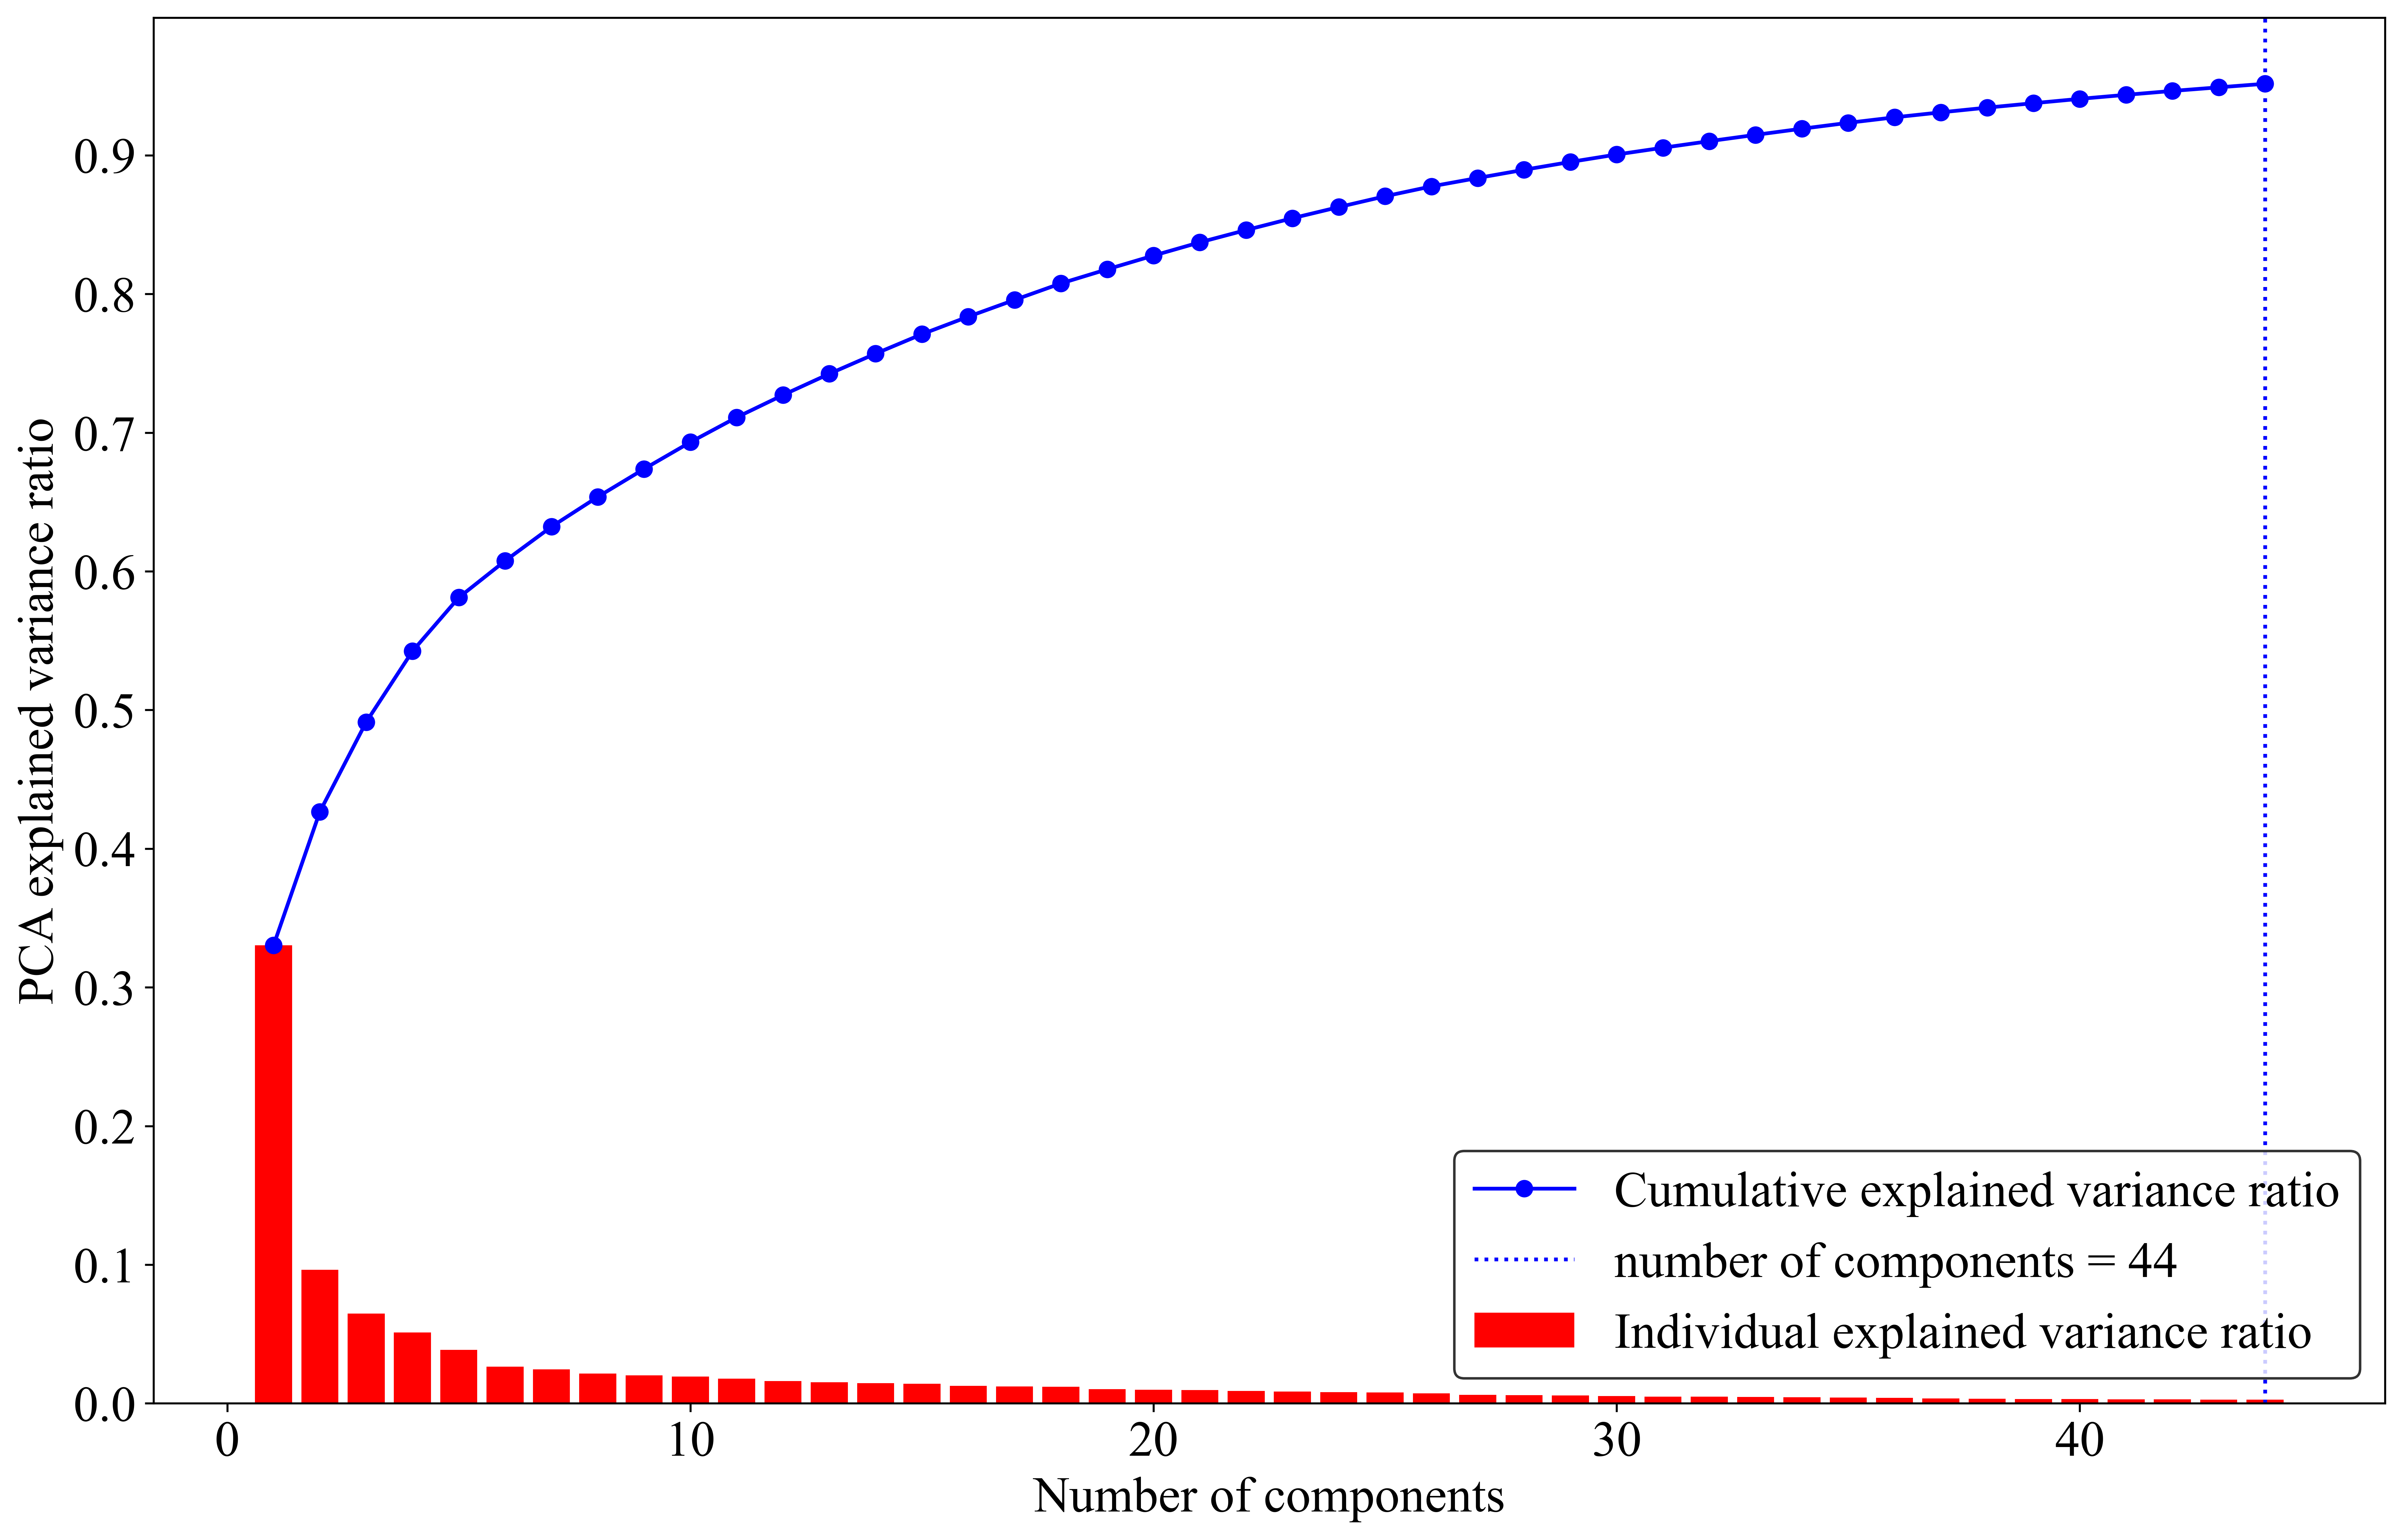

In [10]:
# Plot PCA cumulative variance

plt.figure(figsize=(16, 10),dpi=600)
plt.yticks(np.arange(0.00,1.01,0.1),family= 'Times New Roman',size=20)
plt.xticks(np.arange(0,pca.n_components_ + 1,step=10),family= 'Times New Roman',size=20)

plt.plot(np.arange(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_),
         color='blue',marker='o',label="Cumulative explained variance ratio")
plt.bar(np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_,color='red',
        label="Individual explained variance ratio")
plt.axvline(
    pca.n_components_,
    linestyle=":",
    label=f'number of components = {pca.n_components_}',color='blue'
)

plt.xlabel('Number of components',fontdict = {'size':20,'family' : 'Times New Roman'})
plt.ylabel('PCA explained variance ratio',fontdict = {'size':20,'family' : 'Times New Roman'})
plt.legend(frameon=True, loc='lower right',prop = {'size':20,'family' : 'Times New Roman'},
                        edgecolor='black' )
#plt.savefig('PCA_final.png', bbox_inches='tight', dpi=600)
plt.show()

In [11]:
import numpy as np

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# PC1 contribution
pc1_variance = explained_variance[0]
print(f"PC1 explains {pc1_variance * 100:.2f}% of the total variance.")

# Number of PCs to reach at least 95% variance
num_pcs_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"{num_pcs_95} PCs are required to explain at least 95% of the variance.")

# Number of PCs to reach 100% (or very close)
num_pcs_100 = np.argmax(cumulative_variance >= 0.99) 
print(f"{num_pcs_100} PCs are required to explain ~100% of the variance.")


PC1 explains 33.02% of the total variance.
44 PCs are required to explain at least 95% of the variance.
0 PCs are required to explain ~100% of the variance.


In [12]:
# Explained variance ratios for all PCs
explained_variance = pca.explained_variance_ratio_

# Explained variance for the first 10 PCs
for i in range(10):
    print(f"PC{i+1} explains {explained_variance[i] * 100:.2f}% of the total variance.")


PC1 explains 33.02% of the total variance.
PC2 explains 9.64% of the total variance.
PC3 explains 6.47% of the total variance.
PC4 explains 5.12% of the total variance.
PC5 explains 3.87% of the total variance.
PC6 explains 2.64% of the total variance.
PC7 explains 2.46% of the total variance.
PC8 explains 2.15% of the total variance.
PC9 explains 2.01% of the total variance.
PC10 explains 1.93% of the total variance.


In [13]:
# Explained variance ratios for all PCs
explained_variance = pca.explained_variance_ratio_

# Sum of variance explained by the first 10 PCs
variance_10_pcs = explained_variance[:10].sum()

print(f"The first 10 PCs explain {variance_10_pcs * 100:.2f}% of the total variance.")


The first 10 PCs explain 69.31% of the total variance.


In [14]:
loadings = pd.DataFrame(pca.components_, columns=newdata.columns[2:], index=[f"PC{i+1}" for i in range(pca.n_components_)])
# Assuming `loadings` is a DataFrame with PCA loadings
top_descriptors = {}
for pc in range(len(loadings)):  # Iterate over all PCs
    pc_name = f"PC{pc+1}"
    top_descriptors[pc_name] = loadings.iloc[pc].abs().nlargest(10).index.tolist()

print("Top descriptors for each PC based on loadings:")
for pc, descriptors in top_descriptors.items():
    print(f"{pc}: {descriptors}")

Top descriptors for each PC based on loadings:
PC1: ['nHeavyAtom', 'SP-0', 'Connectivity index 0X ', 'WTPT-1', 'Connectivity index 1X ', 'SP-1', 'ETA_Eta_R_L', 'nBonds', 'ATS1m', 'ETA_Alpha']
PC2: ['ETA_dPsi_A', 'ETA_Psi_1', 'ETA_dEpsilon_C', 'AATSC0e', 'ETA_Epsilon_2', 'Mare', 'AATS0e', 'ETA_Epsilon_4', 'Mse', 'ETA_dEpsilon_A']
PC3: ['GATS1v', 'Mv', 'AATS0v', 'ETA_dBeta', 'ETA_BetaP', 'AATS2v', 'AATS1v', 'ETA_BetaP_ns', 'ETA_dEpsilon_B', 'nHCsats']
PC4: ['BIC3', 'RotBFrac', 'SIC3', 'SwHBa', 'BIC4', 'SpMin5_Bhe', 'SpMin4_Bhi', 'nAtomLC', 'nAtomLAC', 'SIC4']
PC5: ['JGI1', 'ETA_EtaP_B', 'ATSC2m', 'VC-3', 'ETA_EtaP_B_RC', 'VC-4', 'ETA_Eta_B', 'SC-4', 'ETA_Shape_X', 'nssssC']
PC6: ['AATSC0p', 'nX', 'SsCl', 'nsCl', 'nCl', 'AATSC0m', 'BCUTw-1h', 'minsCl', 'maxsCl', 'AATS0m']
PC7: ['nHsOH', 'nsOH', 'SsOH', 'minHBd', 'ATSC1m', 'SHsOH', 'maxHBd', 'maxsOH', 'minsOH', 'ATSC1i']
PC8: ['MATS6p', 'AATSC6p', 'AATSC6i', 'MATS6i', 'MATS6v', 'AATSC6v', 'VR1_Dzi', 'VR1_Dzv', 'VR1_DzZ', 'VR1_Dzm']
PC9: ['

Loadings for descriptors in PC1 (sorted by absolute value):
nHeavyAtom                0.052541
SP-0                      0.052503
Connectivity index 0X     0.052465
WTPT-1                    0.052441
Connectivity index 1X     0.052430
SP-1                      0.052403
ETA_Eta_R_L               0.052403
nBonds                    0.052348
ATS1m                     0.052233
ETA_Alpha                 0.052179
ETA_Beta_s                0.052177
MW                        0.052159
Zagreb                    0.052040
SP-2                      0.052005
ZMIC0                     0.051969
MLFER_L                   0.051939
Quadrupole moment         0.051916
Kier1                     0.051738
ATS1s                     0.051693
SpMAD_D                   0.051666
Name: PC1, dtype: float64


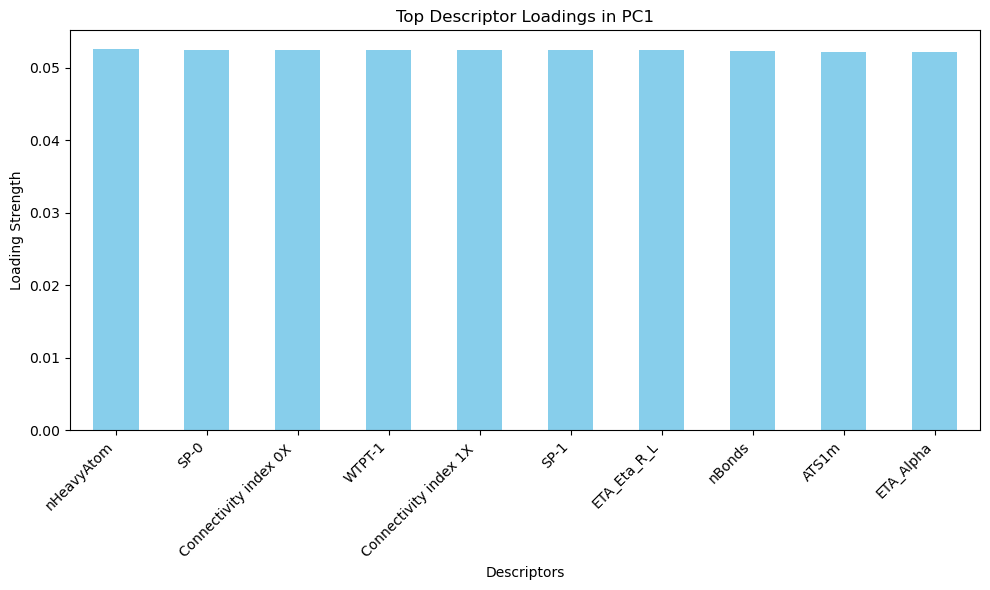

In [15]:
# Assuming `loadings` is the DataFrame with PCA loadings
# Select the row corresponding to PC1
pc1_loadings = loadings.loc["PC1"]

# Sort the loadings by their absolute value in descending order to see the most influential descriptors
pc1_sorted_loadings = pc1_loadings.abs().sort_values(ascending=False)

# Print the sorted loadings for PC1
print("Loadings for descriptors in PC1 (sorted by absolute value):")
print(pc1_sorted_loadings.head(20))

# Optional: If you want to visualize the top descriptors in PC1
import matplotlib.pyplot as plt

top_n = 10  # Number of top descriptors to visualize
pc1_sorted_loadings.head(top_n).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Top Descriptor Loadings in PC1")
plt.ylabel("Loading Strength")
plt.xlabel("Descriptors")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
# Define parameter grid 
n_estimators_range=[int(x) for x in np.arange(10,300,10)]
max_depth_range=[int(x) for x in np.arange(10,100,10)]
param_grid={'n_estimators':n_estimators_range,
            'max_depth':max_depth_range}

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
# Initialize the RF model
regressor = RandomForestRegressor(random_state=42)

# Define the K-fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [18]:
# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=kf, scoring='r2')

In [19]:
# Fit the model
grid_search.fit(X_train_pca, y_train)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [10, 20, ...], 'n_estimators': [10, 20, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,290


In [20]:
num_runs=5
run_times_seconds=[]
for run in range(num_runs):
    start_time = time.time()
    grid_search.fit(X_train_pca, y_train)
    end_time = time.time()
    elapsed_time_sec = end_time - start_time
    run_times_seconds.append(elapsed_time_sec)
    elapsed_time_min = elapsed_time_sec / 60
    print(f"Run {run + 1}: {elapsed_time_sec:.2f} seconds ({elapsed_time_min:.2f} minutes)")
    
# Compute average and std dev
avg_sec = np.mean(run_times_seconds)
std_sec = np.std(run_times_seconds)
avg_min = avg_sec / 60
std_min = std_sec / 60

# Final output
print(f"\nAverage training time: {avg_sec:.2f} seconds ({avg_min:.2f} minutes)")
print(f"Standard deviation: {std_sec:.2f} seconds ({std_min:.2f} minutes)")

Run 1: 999.54 seconds (16.66 minutes)
Run 2: 995.39 seconds (16.59 minutes)
Run 3: 999.38 seconds (16.66 minutes)
Run 4: 1012.25 seconds (16.87 minutes)
Run 5: 993.22 seconds (16.55 minutes)

Average training time: 999.96 seconds (16.67 minutes)
Standard deviation: 6.60 seconds (0.11 minutes)


In [22]:
#Retrieve the best hyperparameters and the best estimator from the grid_search
best_params=grid_search.best_params_
grid_result = grid_search.best_estimator_

In [23]:
best_params

{'max_depth': 10, 'n_estimators': 290}

In [24]:
grid_result

,n_estimators,290
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
# Get the best model
best_model = grid_search.best_estimator_

In [26]:
# Make predictions
y_train_pred = best_model.predict(X_train_pca)
y_test_pred = best_model.predict(X_test_pca)

In [27]:
# Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [28]:
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [29]:
train_r2

0.9363177411224304

In [30]:
test_r2

0.8038972549272041

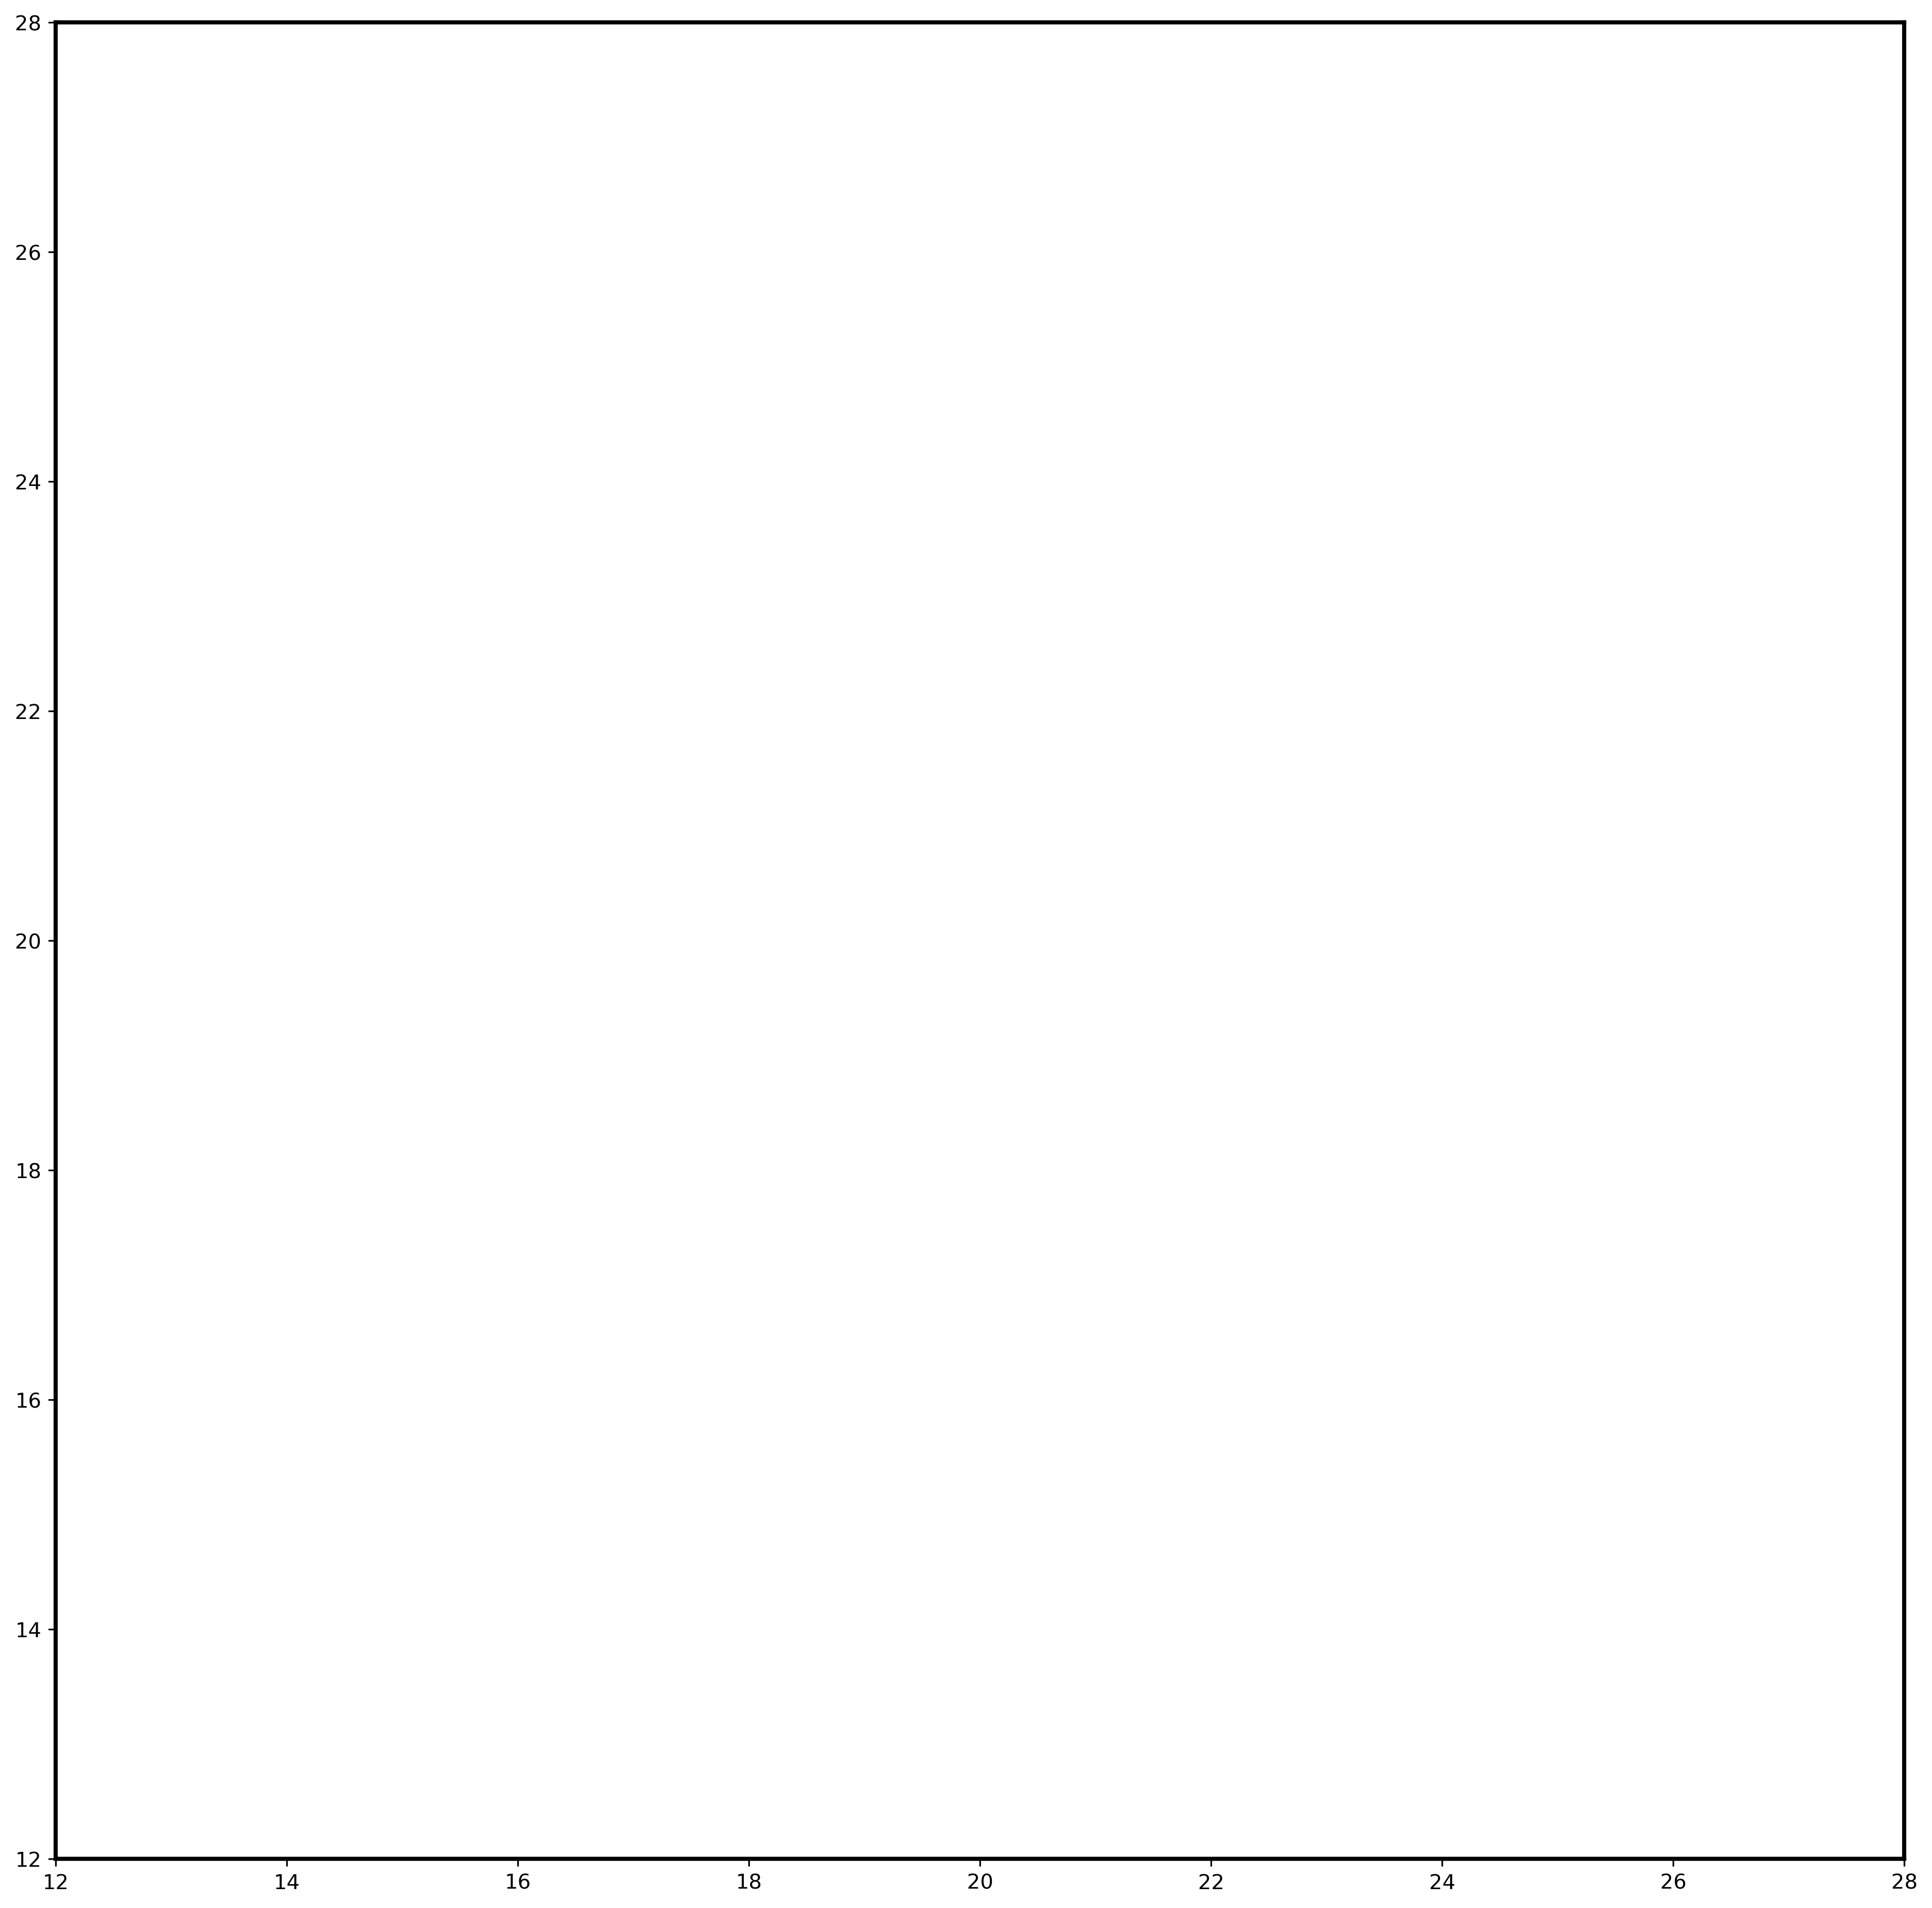

In [31]:
# Plot the predicted values versus the true values for the training and test sets
f, ax = plt.subplots(figsize=(16, 16),dpi=300)
plt.xlim((12, 28))
plt.ylim((12, 28))
ax.spines['bottom'].set_linewidth(2.0)
ax.spines['top'].set_linewidth(2.0)
ax.spines['right'].set_linewidth(2.0)
ax.spines['left'].set_linewidth(2.0)

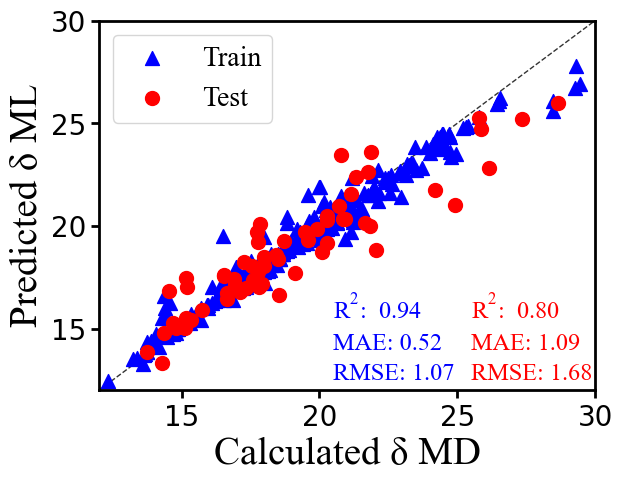

In [32]:
import matplotlib.pyplot as plt
orange_accent2 = (255/255, 192/255, 0/255)
plt.plot([12, 30], [12, 30], ls="--", c=".2", linewidth=1, zorder=1)
plt.scatter(y_train, y_train_pred, c='blue', marker='^', s=100, label='Train', zorder=2)
plt.scatter(y_test, y_test_pred, c='red', marker='o', s=100, label='Test', zorder=2)
plt.xlim(12, 30)
#plt.xticks([])
plt.ylim(12, 30)

# Set font properties
font_properties = {'family': 'Times New Roman', 'size': 28}

# Apply black border and customize ticks
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['left'].set_color('black')
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['bottom'].set_linewidth(2)

# Increase tick size and label size
plt.tick_params(axis='both', which='major', labelsize=20, width=2, length=6)


plt.xlabel('Calculated δ MD',fontsize=28,family= 'Times New Roman')
plt.ylabel('Predicted δ ML',fontsize=28,family= 'Times New Roman')

# Legend
plt.legend(loc='upper left', prop={'size': 20, 'family': 'Times New Roman'})

plt.annotate("$\mathregular {{R^{{2}}}}$: {:5.2f}".format(test_r2),
        (22, 14), xytext=(25.5, 15.5),
        fontsize=17.5,family= 'Times New Roman',c='red')
plt.annotate("MAE:{:5.2f}".format(test_mae),
        (22, 14), xytext=(25.5, 14),
        fontsize=17.5,family= 'Times New Roman',c='red')
plt.annotate("RMSE:{:5.2f}".format(test_rmse),
        (22, 14), xytext=(25.5, 12.5),
        fontsize=17.5,family= 'Times New Roman',c='red')
plt.annotate("$\mathregular {{R^{{2}}}}$: {:5.2f}".format(train_r2),
        (22, 14), xytext=(20.5, 15.5),
        fontsize=17.5,family= 'Times New Roman',c='blue')
plt.annotate("MAE:{:5.2f}".format(train_mae),
        (22, 14), xytext=(20.5, 14),
        fontsize=17.5,family= 'Times New Roman',c='blue')
plt.annotate("RMSE:{:5.2f}".format(train_rmse),
        (22, 14), xytext=(20.5, 12.5),
        fontsize=17.5,family= 'Times New Roman',c='blue')
#plt.title('PCA_RF',x=0.5,y=1.01,fontsize=25,family= 'Times New Roman')
#plt.savefig('RF_PCA_paper.png', bbox_inches='tight', dpi=800)
plt.show()

In [33]:
# output scores and best parameters
print("Train R2 Score:", train_r2)
print("Test R2 Score:", test_r2)
print("Train MAE Score:", train_mae)
print("Test MAE Score:", test_mae)
print("Train RMSE Score:", train_rmse)
print("Test RMSE Score:", test_rmse)
print('best_params_')
print(best_params)

Train R2 Score: 0.9363177411224304
Test R2 Score: 0.8038972549272041
Train MAE Score: 0.5235358475065945
Test MAE Score: 1.0936591025046063
Train RMSE Score: 1.0722656136295934
Test RMSE Score: 1.6780037764747688
best_params_
{'max_depth': 10, 'n_estimators': 290}
